In [49]:
from typing import List

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def generate_synthetic_data(
    start_date: str = "2020-01-01",
    end_date: str = "2024-12-31",
    linear_slope: float = 0.0,
    amplitude_list: List[float] = [1.0],
    period_list: List[float] = [1.0],
    variance: float = 0.01,
    random_seed: int = 42,
) -> pd.DataFrame:
    """
    Generate synthetic time-series data with multiple sinusoidal components,
    a linear trend, and random noise.

    Parameters:
    start_date (str): Start date of the time-series in 'YYYY-MM-DD' format.
    end_date (str): End date of the time-series in 'YYYY-MM-DD' format.
    linear_slope (float): Slope of the linear trend component.
    amplitude_list (List[float]): List of amplitudes for the sinusoidal components.
    period_list (List[float]): List of periods (in years) for the sinusoidal components.
    variance (float): Variance of the random noise component.
    random_seed (int): Seed for the random number generator.

    Returns:
    pd.DataFrame: DataFrame containing the generated time-series data.
    """
    np.random.seed(random_seed)
    dates = pd.date_range(start=start_date, end=end_date, freq="D")
    days = (dates - dates[0]).days
    PI = np.pi

    # Create the seasonal component using numpy vectorization
    seasonal_component = np.sum(
        [amp * np.sin(2 * PI * days / (period * 365.25)) for amp, period in zip(amplitude_list, period_list)], axis=0
    )

    # Create a trend component
    trend_component = linear_slope * days

    # Create a random noise component
    noise_component = np.random.normal(scale=variance, size=len(dates))

    # Combine all components to create the time-series data
    data = seasonal_component + trend_component + noise_component

    return pd.DataFrame({"date": dates, "value": data}).set_index("date")

<AxesSubplot: xlabel='date'>

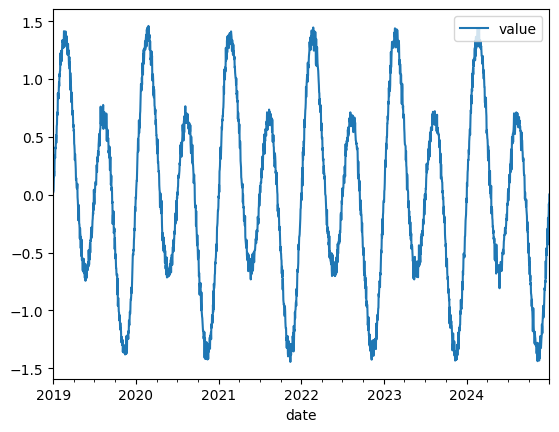

In [42]:
gwl_array = generate_synthetic_data(
    start_date="2019-01-01",
    end_date="2024-12-31",
    linear_slope=0,
    amplitude_list=[0.5, 1],
    period_list=[1, 0.5],
    variance=0.05,
)
gwl_array.plot()

<AxesSubplot: xlabel='date'>

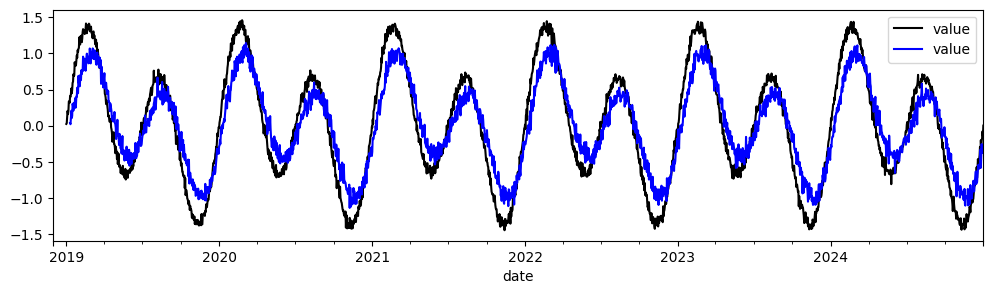

In [65]:
deformation_arr = generate_synthetic_data(
    start_date="2018-12-01",
    end_date="2024-12-31",
    linear_slope=0,
    amplitude_list=[0.4, 0.7],
    period_list=[1., 0.5],
    variance=0.075,
)
# deformation_arr = deformation_arr.shift(40)
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
gwl_array.plot(ax=ax, color='black')
deformation_arr.plot(ax=ax, color='blue')